In [5]:
using Pkg
import Pkg; Pkg.add("LaTeXStrings")
using Plots
using LaTeXStrings

    Updating registry at `C:\Users\ceci_\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\ceci_\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ceci_\.julia\environments\v1.7\Manifest.toml`


# Modelo de Hodgkin-Huxley

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

Con [Wells]:
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $V$ la diferencia de potencial en la membrana
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:
\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}
Observemos que cuando $V = 10$ la función está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}

# CANALES DE POTASIO

### EJERCICIO
* Programa las función alfa_n como función del voltaje V.
* Necesitarás definir un caso especial cuando V - 10 < epsilon
* Utiliza esta celda para ver como se comporta tu función en esta vecindad y elegir un valor de epsilon adecuado

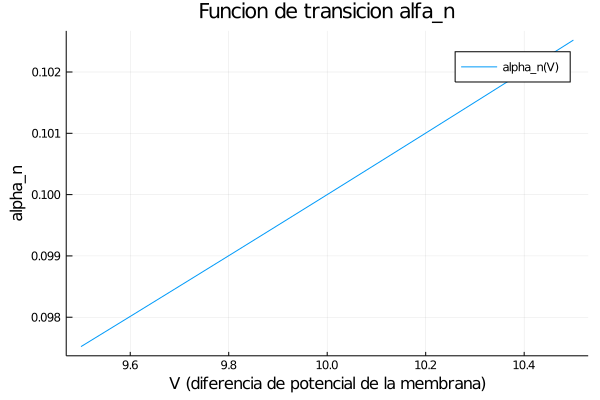

In [13]:

#SOLUCIÓN
#La función es indefinida de V= 9.9999999999999999 a V= 10.000000000000001, entonces el epsilon adecuado es:

epsilon= 0.000000000000001

function alpha_n(V)
    α_n = (0.01 * (10 - V)) / (ℯ^((10-V) / 10) .- 1)

if abs(V-10) < epsilon                  #Si el valor absoluto de V-10 es menor a nuestro grado de aproximación ϵ
        return 0.1                      #Por L´Hopital el límite cuando V tiende a 10 es 0.1
    else 
        return α_n
    end 
end


plot(alpha_n, 9.5:0.1:10.5, title="Funcion de transicion alfa_n", 
    xlabel="V (diferencia de potencial de la membrana)", ylabel= "alpha_n", label="alpha_n(V)")


#Observamos que la gráfica ya no tiene un intervalo abierto de V= 9.9999999999999999 a V= 10.000000000000001

In [14]:
alpha_n([10,9,7])

LoadError: MethodError: no method matching -(::Int64, ::Vector{Int64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
[0mClosest candidates are:
[0m  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at C:\Users\ceci_\AppData\Local\Programs\Julia-1.7.2\share\julia\base\int.jl:85
[0m  -(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at C:\Users\ceci_\AppData\Local\Programs\Julia-1.7.2\share\julia\base\int.jl:86
[0m  -([91m::SparseArrays.AbstractSparseMatrixCSC[39m, ::Array) at C:\Users\ceci_\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\SparseArrays\src\sparsematrix.jl:1776
[0m  ...

### EJERCICIO
* Programa la funciones como función del voltaje V, para la compuerta de K
* Genera luego una gráfica de alfa_n y beta_n

In [3]:
##SOLUCIÓN

#Función beta_n

function beta_n(V) 
    β_n = 0.125*ℯ^(-V/80)
    return β_n
end



V = -150:150
α = alpha_n.(V)
β = beta_n.(V)

plot(V, α, title="Tazas de transicion", xlabel="V con respecto a V_r (mV)", ylabel="traza (ms^{-1})", label="alpha(V)")
plot!(V,β, label="beta(V)")


LoadError: UndefVarError: alpha_n not defined

# CANALES DE SODIO

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1} & \beta_m(V) &= 4 e^{-\frac{V}{18}} \\
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}} & \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}
Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) &= \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)}
               = \frac{-0.1}{-0.1} = 1
\end{align}

### EJERCICIO
* Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.
* Agrega las funciones correspondientes para la compuerta de sodio también.

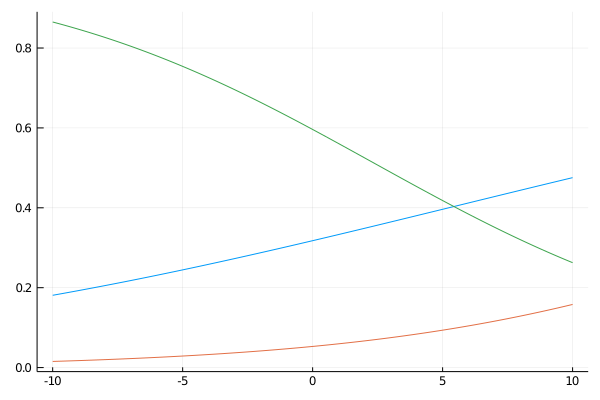

In [20]:
##SOLUCIÓN

#α_m
#La función es indefinida de V= 24.999999999999999 a V= 25.000000000000001, entonces el epsilon adecuado es:

epsilon= 0.000000000000001

function alpha_m(V)
    α_m = (0.1*(25-V))/(ℯ^((25-V)/10)-1)

if abs(V-25) < epsilon               #Si el valor absoluto de V-25 es menor a nuestro grado de aproximación ϵ
        return 0.1                   #Por L´Hopital el límite cuando V tiende a 25 es 0.1
    else 
        return α_m
    end 
end


#β_m
function beta_m(V)
    β_m = 4*ℯ^-(V/18)
    return β_m
end

#α_h
function alpha_h(V)
    α_h = 0.07*ℯ^(-V/20)
    return α_h
end

#β_h
function beta_h(V)
    β_h = 1/(ℯ^((30-V)/10)+1)
    return β_h
end



#Función general de τau para el canal de potasio y sodio 
function tau_inf(alpha, beta)
    τ_∞ = 1 ./(alpha .+ beta)
    return τ_∞
end


#Función general de n para el canal de potasio y sodio 
function n_inf(alpha, beta)
    n_∞ = alpha ./ (alpha .+ beta)
    return n_∞
end









V = -10:0.1:10
α_n = alpha_n.(V)
β_n = beta_n.(V)

α_m = alpha_m.(V)
β_m = beta_m.(V)

α_h = alpha_h.(V)
β_h = beta_h.(V)



  
n_∞_n = n_inf(α_n, β_n)
τ_∞_n = tau_inf(α_n, β_n)
    
n_∞_m = n_inf(α_m, β_m)
τ_∞_m = tau_inf(α_m, β_m)
    
n_∞_h = n_inf(α_h, β_h)
τ_∞_h = tau_inf(α_h, β_h)

matriz = [n_∞_n n_∞_m n_∞_h]

    


p1= plot(V, [n_∞_n n_∞_m n_∞_h], label= false)
 




In [21]:
n_inf(α_n, β_n)

201-element Vector{Float64}:
 0.1810006136660712
 0.1821615060138769
 0.18332714269324973
 0.1844975139005812
 0.1856726094953512
 0.1868524189993793
 0.18803693159612547
 0.18922613613004233
 0.19042002110597733
 0.19161857468862772
 0.19282178470204664
 0.19402963862920242
 0.1952421236115903
 ⋮
 0.4582480354300048
 0.4598217698789438
 0.4613942360886301
 0.4629653998584554
 0.4645352271952349
 0.4661036843156798
 0.4676707376488276
 0.4692363538384169
 0.47080049974521415
 0.4723631424492989
 0.47392424925229276
 0.47548378767952965

In [19]:
tau_inf(α_n, β_n)

201-element Vector{Float64}:
 5.782115373267013
 5.781141414189933
 5.7801223941307915
 5.779058229364054
 5.77794883853701
 5.776794142690384
 5.775594065278697
 5.7743485321903645
 5.773057471767511
 5.771720814825523
 5.770338494672299
 5.768910447127227
 5.767436610539851
 ⋮
 4.844017941033588
 4.835987768933774
 4.827941298817718
 4.8198788236469285
 4.811800636062954
 4.80370702835836
 4.795598292447866
 4.787474719839797
 4.779336601607778
 4.771184228362598
 4.7630178902244165
 4.754837876795296

In [7]:
n_∞_n

201×201 Matrix{Float64}:
 0.000775411  0.000775541  0.000775678  …  0.000941318  0.000942937
 0.000780515  0.000780647  0.000780785     0.000947515  0.000949145
 0.000785648  0.000785781  0.000785919     0.000953746  0.000955387
 0.00079081   0.000790943  0.000791082     0.000960012  0.000961663
 0.000795999  0.000796133  0.000796274     0.000966312  0.000967974
 0.000801217  0.000801352  0.000801494  …  0.000972646  0.000974319
 0.000806464  0.0008066    0.000806742     0.000979015  0.0009807
 0.000811739  0.000811876  0.000812019     0.000985419  0.000987115
 0.000817044  0.000817181  0.000817325     0.000991859  0.000993565
 0.000822377  0.000822515  0.00082266      0.000998333  0.00100005
 0.000827739  0.000827878  0.000828024  …  0.00100484   0.00100657
 0.00083313   0.00083327   0.000833417     0.00101139   0.00101313
 0.00083855   0.000838692  0.00083884      0.00101797   0.00101972
 ⋮                                      ⋱               ⋮
 0.00234333   0.00234372   0.00234414  

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproxima a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y a partir de él, se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} &= g_{Na}m^3h   &   G_{K} &= g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando el método de Euler produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [52]:
parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

### EJERCICIO
* Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t)
* Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
* Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes, ¿Qué observas?
* Inserta al final una celda con tus comentarios y resultados

In [53]:
## SOLUCIÓN


    """Devuelve la solucion a las ecuaciones diferenciales del modelo de Hodgkin
    y Huxley utilizando el metodo de Euler"""

  
function EulerHodkinHuxley(f, α, a, b, N)  #parámetros
    
    n1 = N + 1
    u = zeros(n1, 2) 
    h = (b - a)/N
    u[1,1] = a
    u[1,2] = α 
  
    for i in 2:n1
        u[1,1] = u[i-1, 2] + h * f(u[i-1], u[i-1,2])
        u[i,1] = a + (i-1) * h
    end
    return u
end 












function plotSimulation(resultado)
    tiempo = resultado["T"]
    
    p1 = plot(tiempo, resultado["V"])
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel="t (ms)",
        ylabel=["Voltaje relativo en la membrana (mV)" L"Conductancia (mS/cm^2)" "adimensional" L"\tau (ms)"],
        legend=true
    )
end
    

function simulaHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    parametros["V0"] = V0
    resultado = EulerHodkinHuxley(parametros)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(V0, t0, tfin, current)

LoadError: MethodError: no method matching EulerHodkinHuxley(::Dict{String, Float64})
[0mClosest candidates are:
[0m  EulerHodkinHuxley(::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at In[53]:8

# Comentarios y resultados
Escribe aquí tus resultados